まずはとりあえず一番大きい相関係数が大きいやつの多項式回帰⇨変数を増やして、多項式回帰

In [1]:
# 必要なライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

データの読み込みをするよ

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
#相関係数のが大きいやつをみる⇨sortするよ
train_df.corr().sort_values(by='SalePrice')

,MSSubClass,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,...,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,SalePrice
MasVnrType,0.246813,0.400196,0.449358,0.420443,0.310870,1.000000,0.579165,0.415825,0.310319,0.393052,...,0.305025,0.362377,0.194912,0.199416,0.315218,0.343755,0.323321,0.429343,0.380290,0.426997
HeatingQC,0.305789,0.420371,0.457083,0.479935,0.519679,0.245128,0.159256,0.520027,0.519447,0.410107,...,0.342358,0.504228,0.159916,0.129689,0.276766,0.476886,0.376344,0.337794,0.295462,0.427649
GarageType,0.510706,0.456575,0.420713,0.519992,0.387933,0.315218,0.221484,0.378696,0.401139,0.424760,...,0.364099,0.339323,0.203209,0.289770,1.000000,0.387758,0.568232,0.264771,0.209133,0.430770
Fireplaces,0.283353,0.315569,0.396765,0.214032,0.162493,0.199416,0.247906,0.249335,0.113338,0.227714,...,0.244451,0.256409,0.319088,1.000000,0.289770,0.127751,0.269653,0.300840,0.269141,0.466929
MasVnrArea,0.212010,0.368029,0.410238,0.298983,0.193044,0.579165,1.000000,0.349637,0.209916,0.314065,...,0.266274,0.285190,0.280041,0.247906,0.221484,0.229848,0.251678,0.404375,0.372567,0.475241
MSSubClass,1.000000,0.532233,0.471136,0.572252,0.415910,0.246813,0.212010,0.393934,0.445768,0.423389,...,0.329673,0.391700,0.253413,0.283353,0.510706,0.408647,0.438262,0.397369,0.387789,0.476982
GarageFinish,0.438262,0.466576,0.491404,0.554784,0.446760,0.323321,0.251678,0.482143,0.487728,0.525068,...,0.420880,0.423690,0.224545,0.269653,0.568232,0.500379,1.000000,0.365879,0.301241,0.496031
Foundation,0.445768,0.576118,0.568969,0.699337,0.551916,0.310319,0.209916,0.597832,1.000000,0.621976,...,0.462312,0.533146,0.180213,0.113338,0.401139,0.644742,0.487728,0.458128,0.398155,0.505503
YearRemodAdd,0.415910,0.521638,0.552825,0.652419,1.000000,0.310870,0.193044,0.570870,0.551916,0.545541,...,0.452501,0.611669,0.217923,0.162493,0.387933,0.617250,0.446760,0.433995,0.390554,0.535370
GarageYrBlt,0.408647,0.579489,0.574261,0.768672,0.617250,0.343755,0.229848,0.590883,0.644742,0.642954,...,0.497623,0.536959,0.213629,0.127751,0.387758,1.000000,0.500379,0.485292,0.462037,0.535419


0.68以上のやつは5つ

OverallQual、GrLivArea、Neighborhood、GarageCars、ExterQual

In [4]:
#特徴量を抽出
oq = train_df.loc[:,['OverallQual']].values
gla = train_df.loc[:,['GrLivArea']].values
nbh = train_df.loc[:,['Neighborhood']].values
gc = train_df.loc[:,['GarageCars']].values
eq = train_df.loc[:,['ExterQual']].values

y = train_df.loc[:,['SalePrice']].values

In [5]:
#ホールドアウト法によるデータの分類
#random_stateを0に固定してあるので、毎回同じサンプルに分割
from sklearn.model_selection import train_test_split
oq_train,oq_test,y_train,y_test = train_test_split(oq,y,test_size=0.3,random_state = 0)

In [6]:
#線形回帰のモデルを学習させる
from sklearn.linear_model import LinearRegression
model_lin = LinearRegression()
model_lin.fit(oq_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

線形回帰の学習結果を散布図に当てはめてみる。
最小二乗法を利用する。

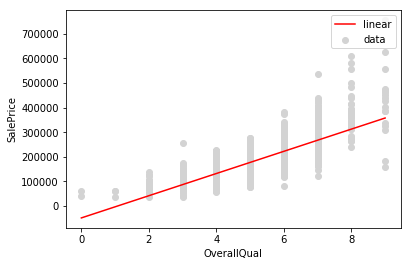

In [7]:
#散布図に近似直線を重ねてみる
plt.scatter(oq,y,color='lightgray',label='data')#散布図を表示
x = np.arange(0,10,1)[:,np.newaxis]#プロットのためのxを用意
plt.plot(x,model_lin.predict(x),color='red',label='linear')#回帰直線を表示
plt.xlabel('OverallQual')#x軸のラベルを表示
plt.ylabel('SalePrice')#y軸のラベルを表示
plt.legend(loc='upper right')#凡例を表示
plt.show()#上記の内容でグラフを表示

なんか微妙だな、もっと次数を増やしてみよう

In [8]:
#多項式基底の基底関数によって変数変換を行う。まずは二次関数の変数変換
from sklearn.preprocessing import PolynomialFeatures
quad = PolynomialFeatures(degree=2)#2次の多項式基底を生成
oq_quad = quad.fit_transform(oq) #生成した基底関数で変数変換を実行
oq_quad

array([[  1.,   6.,  36.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       ..., 
       [  1.,   6.,  36.],
       [  1.,   4.,  16.],
       [  1.,   4.,  16.]])

In [9]:
#ホールド・アウト法によるデータの分類
#random_stateを0に固定してあるので、毎回同じサンプルに分割
oq_quad_train,oq_quad_test,_,_ = train_test_split(oq_quad,y,test_size=0.3,random_state=0)

In [10]:
#線形回帰のインスタンスを生成
model_quad = LinearRegression()

#変換後の変数を利用して実行
model_quad.fit(oq_quad_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

当てはまり良くなってるかプロットしてみる

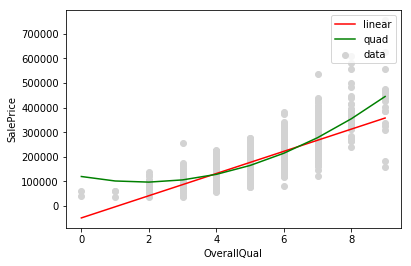

In [11]:
# 散布図に近似直線､近似曲線を重ねてみる
plt.scatter(oq, y, color='lightgray', label='data')               # 散布図を表示
plt.plot(x, model_lin.predict(x), color='red', label='linear')       # 回帰直線を表示
x_quad = quad.fit_transform(x)                                       # プロットのためのxも2変数変換する
plt.plot(x, model_quad.predict(x_quad), color='green', label='quad') # 回帰曲線を表示（2次関数）
plt.xlabel('OverallQual')                                                  # x軸のラベルを表示
plt.ylabel('SalePrice')                                                   # y軸のラベルを表示
plt.legend(loc = 'upper right')                                      # 凡例を表示
plt.show()   

う〜ん。続いて、三次関数!

In [12]:
#三次関数の変数変換
cubic = PolynomialFeatures(degree=3)#3次の多項式基底を生成
oq_cubic = cubic.fit_transform(oq)#生成した基底関数で変数変換を実行
oq_cubic

array([[   1.,    6.,   36.,  216.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       ..., 
       [   1.,    6.,   36.,  216.],
       [   1.,    4.,   16.,   64.],
       [   1.,    4.,   16.,   64.]])

In [13]:
#ホールド・アウト法による分割
oq_cubic_train,oq_cubic_test,_,_ = train_test_split(oq_cubic,y,test_size=0.3,random_state=0)

In [14]:
#線形回帰のインスタンスを生成
model_cubic = LinearRegression()

#変換後の変数を利用して実行
model_cubic.fit(oq_cubic_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

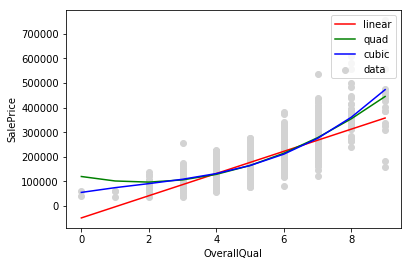

In [15]:
#散布図に近似直線、近似曲線を重ねてみる
plt.scatter(oq,y,color='lightgray',label='data')#散布図を表示
plt.plot(x,model_lin.predict(x),color='red',label='linear')#回帰直線を表示
plt.plot(x,model_quad.predict(x_quad),color='green',label='quad')#回帰直線を表示(二次関数)
x_cubic = cubic.fit_transform(x)#プロットのためのxも2変数変換する
plt.plot(x,model_cubic.predict(x_cubic),color='blue',label='cubic')#回帰曲線を表示(二次関数)
plt.xlabel('OverallQual')#x軸のラベルを表示
plt.ylabel('SalePrice')#y軸のラベルを表示
plt.legend(loc = 'upper right') #凡例を表示
plt.show()#上記の内容でグラフを表示

定量確認のために自由度調節済み決定係数を利用

In [16]:
#自由度調整済み決定係数
#(決定係数、trainまたはtestのサンプル数、利用した特徴量の数)
def adjusted(score,n_sample,n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score

In [17]:
#自由度調節済み決定係数をtrainとtestに分けて出力
print('adjusted_score R^2')
print('')

#線形回帰
print('model_linear')
print('train: %.3f' % adjusted(model_lin.score(oq_train,y_train),len(y_train),1))
print('test: %.3f' % adjusted(model_lin.score(oq_test,y_test),len(y_test),1))
print('')

#二次関数
print('model_quad')
print('train: %.3f' % adjusted(model_quad.score(oq_quad_train,y_train),len(y_train),2))
print('test: %.3f' % adjusted(model_quad.score(oq_quad_test,y_test),len(y_test),2))
print('')
      
#三次関数
print('model_cubic')
print('train: %.3f' % adjusted(model_cubic.score(oq_cubic_train,y_train),len(y_train),3))
print('test: %.3f' % adjusted(model_cubic.score(oq_cubic_test,y_test),len(y_test),3))

adjusted_score R^2

model_linear
train: 0.615
test: 0.647

model_quad
train: 0.671
test: 0.691

model_cubic
train: 0.675
test: 0.689


重回帰分析より低い、まず7にいってない。。。。。。。

In [18]:
#OverallQual(一次)にGrLivAreaを加える
X_lin = np.hstack((oq,gla))

In [19]:
#ホールド・アウト法によるデータの分割
X_lin_train, X_lin_test, _, _ = train_test_split(X_lin, y, test_size = 0.3, random_state = 0)
#線形回帰による学習
model_lin_2 = LinearRegression()
model_lin_2.fit(X_lin_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
# LSTAT（2次）にRMを加える
X_quad = np.hstack((oq_quad, gla))

In [21]:
# ホールド・アウト法によるデータの分割
X_quad_train, X_quad_test, _, _ = train_test_split(X_quad, y, test_size = 0.3, random_state = 0)
# 線形回帰による学習
model_quad_2 = LinearRegression()
model_quad_2.fit(X_quad_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
# LSTAT（3次）にRMを加える
X_cubic = np.hstack((oq_cubic, gla))

In [23]:
# ホールド・アウト法によるデータの分割
X_cubic_train, X_cubic_test, _, _ = train_test_split(X_cubic, y, test_size = 0.3, random_state = 0)
# 線形回帰による学習
model_cubic_2 = LinearRegression()
model_cubic_2.fit(X_cubic_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
# 自由度調整済み決定係数をtrainとtestに分けて出力
print('adjusted R^2')
print('')

# 線形回帰
print('model_linear_2')
print('train: %.3f' % adjusted(model_lin_2.score(X_lin_train, y_train), len(y_train), 2))
print('test : %.3f' % adjusted(model_lin_2.score(X_lin_test, y_test), len(y_test), 2))
print('')

# 2次関数
print('model_quad_2')
print('train: %.3f' % adjusted(model_quad_2.score(X_quad_train, y_train), len(y_train), 3))
print('test : %.3f' % adjusted(model_quad_2.score(X_quad_test, y_test), len(y_test), 3))
print('')

# 3次関数
print('model_cubic_2')
print('train: %.3f' % adjusted(model_cubic_2.score(X_cubic_train, y_train), len(y_train), 4))
print('test : %.3f' % adjusted(model_cubic_2.score(X_cubic_test, y_test), len(y_test), 4))

adjusted R^2

model_linear_2
train: 0.724
test : 0.689

model_quad_2
train: 0.761
test : 0.722

model_cubic_2
train: 0.764
test : 0.720


上がったからさらに追加してみる。

In [25]:
#OverallQual,GrLivArea(1次)にNeighborhood	を加える
X_lin = np.hstack((X_lin,nbh))

In [26]:
# ホールド・アウト法によるデータの分割
X_lin_train, X_lin_test, _, _ = train_test_split(X_lin, y, test_size = 0.3, random_state = 0)
# 線形回帰による学習
model_lin_3 = LinearRegression()
model_lin_3.fit(X_lin_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
# OverallQual,GrLivArea（2次）にNeighborhoodを加える
X_quad = np.hstack((X_quad,nbh ))

In [28]:
# ホールド・アウト法によるデータの分割
X_quad_train, X_quad_test, _, _ = train_test_split(X_quad, y, test_size = 0.3, random_state = 0)
# 線形回帰による学習
model_quad_3 = LinearRegression()
model_quad_3.fit(X_quad_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
# OverallQual,GrLivArea（3次）にNeighborhoodを加える
X_cubic = np.hstack((X_cubic, nbh))

In [30]:
# ホールド・アウト法によるデータの分割
X_cubic_train, X_cubic_test, _, _ = train_test_split(X_cubic, y, test_size = 0.3, random_state = 0)
# 線形回帰による学習
model_cubic_3 = LinearRegression()
model_cubic_3.fit(X_cubic_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
# 自由度調整済み決定係数をtrainとtestに分けて出力
print('adjusted R^2')
print('')

# 線形回帰
print('model_linear_3')
print('train: %.3f' % adjusted(model_lin_3.score(X_lin_train, y_train), len(y_train), 2))
print('test : %.3f' % adjusted(model_lin_3.score(X_lin_test, y_test), len(y_test), 2))
print('')

# 2次関数
print('model_quad_3')
print('train: %.3f' % adjusted(model_quad_3.score(X_quad_train, y_train), len(y_train), 3))
print('test : %.3f' % adjusted(model_quad_3.score(X_quad_test, y_test), len(y_test), 3))
print('')

# 3次関数
print('model_cubic_3')
print('train: %.3f' % adjusted(model_cubic_3.score(X_cubic_train, y_train), len(y_train), 4))
print('test : %.3f' % adjusted(model_cubic_3.score(X_cubic_test, y_test), len(y_test), 4))

adjusted R^2

model_linear_3
train: 0.772
test : 0.737

model_quad_3
train: 0.804
test : 0.774

model_cubic_3
train: 0.811
test : 0.775


多項式にしたら重回帰分析より高い0.775になった！

## 過学習になるかもしれないけどもう一つモデルを複雑にしてみる

In [32]:
#OverallQual,GrLivArea,Neighborhood	(1次)にGarageCarsを加える
X_lin = np.hstack((X_lin,gc))

In [33]:
# ホールド・アウト法によるデータの分割
X_lin_train, X_lin_test, _, _ = train_test_split(X_lin, y, test_size = 0.3, random_state = 0)
# 線形回帰による学習
model_lin_4 = LinearRegression()
model_lin_4.fit(X_lin_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
# OverallQual,GrLivArea,Neighborhood(２次)にGarageCarsを加える
X_quad = np.hstack((X_quad,gc))

In [35]:
# ホールド・アウト法によるデータの分割
X_quad_train, X_quad_test, _, _ = train_test_split(X_quad, y, test_size = 0.3, random_state = 0)
# 線形回帰による学習
model_quad_4 = LinearRegression()
model_quad_4.fit(X_quad_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
# OverallQual,GrLivArea,Neighborhood（3次）にGarageCarsを加える
X_cubic = np.hstack((X_cubic, gc))

In [37]:
# ホールド・アウト法によるデータの分割
X_cubic_train, X_cubic_test, _, _ = train_test_split(X_cubic, y, test_size = 0.3, random_state = 0)
# 線形回帰による学習
model_cubic_4 = LinearRegression()
model_cubic_4.fit(X_cubic_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
# 自由度調整済み決定係数をtrainとtestに分けて出力
print('adjusted R^2')
print('')

# 線形回帰
print('model_linear_4')
print('train: %.3f' % adjusted(model_lin_4.score(X_lin_train, y_train), len(y_train), 2))
print('test : %.3f' % adjusted(model_lin_4.score(X_lin_test, y_test), len(y_test), 2))
print('')

# 2次関数
print('model_quad_4')
print('train: %.3f' % adjusted(model_quad_4.score(X_quad_train, y_train), len(y_train), 3))
print('test : %.3f' % adjusted(model_quad_4.score(X_quad_test, y_test), len(y_test), 3))
print('')

# 3次関数
print('model_cubic_4')
print('train: %.3f' % adjusted(model_cubic_4.score(X_cubic_train, y_train), len(y_train), 4))
print('test : %.3f' % adjusted(model_cubic_4.score(X_cubic_test, y_test), len(y_test), 4))

adjusted R^2

model_linear_4
train: 0.791
test : 0.760

model_quad_4
train: 0.817
test : 0.787

model_cubic_4
train: 0.823
test : 0.790


さらに0.790まで上がった！！

もう一個いってみよう

In [40]:
#OverallQual,GrLivArea,Neighborhood,GarageCarsにExterQualを(1次)に加える
X_lin = np.hstack((X_lin,eq))
# ホールド・アウト法によるデータの分割
X_lin_train, X_lin_test, _, _ = train_test_split(X_lin, y, test_size = 0.3, random_state = 0)
# 線形回帰による学習
model_lin_5 = LinearRegression()
model_lin_5.fit(X_lin_train, y_train)
#OverallQual,GrLivArea,Neighborhood,GarageCarsにExterQualを(2次)に加える
X_quad = np.hstack((X_quad,eq))
# ホールド・アウト法によるデータの分割
X_quad_train, X_quad_test, _, _ = train_test_split(X_quad, y, test_size = 0.3, random_state = 0)
# 線形回帰による学習
model_quad_5 = LinearRegression()
model_quad_5.fit(X_quad_train, y_train)
#OverallQual,GrLivArea,Neighborhood,GarageCarsにExterQualを(3次)に加える
X_cubic = np.hstack((X_cubic, eq))
# ホールド・アウト法によるデータの分割
X_cubic_train, X_cubic_test, _, _ = train_test_split(X_cubic, y, test_size = 0.3, random_state = 0)
# 線形回帰による学習
model_cubic_5 = LinearRegression()
model_cubic_5.fit(X_cubic_train, y_train)
# 自由度調整済み決定係数をtrainとtestに分けて出力
print('adjusted R^2')
print('')

# 線形回帰
print('model_linear_5')
print('train: %.3f' % adjusted(model_lin_5.score(X_lin_train, y_train), len(y_train), 2))
print('test : %.3f' % adjusted(model_lin_5.score(X_lin_test, y_test), len(y_test), 2))
print('')

# 2次関数
print('model_quad_5')
print('train: %.3f' % adjusted(model_quad_5.score(X_quad_train, y_train), len(y_train), 3))
print('test : %.3f' % adjusted(model_quad_5.score(X_quad_test, y_test), len(y_test), 3))
print('')

# 3次関数
print('model_cubic_5')
print('train: %.3f' % adjusted(model_cubic_5.score(X_cubic_train, y_train), len(y_train), 4))
print('test : %.3f' % adjusted(model_cubic_5.score(X_cubic_test, y_test), len(y_test), 4))

adjusted R^2

model_linear_5
train: 0.798
test : 0.765

model_quad_5
train: 0.819
test : 0.787

model_cubic_5
train: 0.825
test : 0.790


上がらなかったのでここで終了です。